In [1]:
# Imports
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from fnmatch import fnmatch
from pathlib import Path

In [2]:
# Filepath where OUTPUT of macro is saved
# Please save results split by geltype (0.2kPa / soft and 20 kPa / stiff)
filepath_soft = r"Z:\Data\@MiN\Sarah\Projects\Nikita_WoundRepair\QUANT VIDEOS\Delineation & vesicular str\Delineation\Woundarea\Data\SoftGel_OUTPUT"
filepath_stiff = r"Z:\Data\@MiN\Sarah\Projects\Nikita_WoundRepair\QUANT VIDEOS\Delineation & vesicular str\Delineation\Woundarea\Data\StiffGel_OUTPUT"

p = Path(filepath_soft).absolute()
parent_dir = p.parents[0]

In [3]:
# Open "Soft"-Datasets
root_soft = filepath_soft
pattern_Results = "*Results.csv"
pattern_Summary = "*SummaryParticles.txt"

df_X = pd.DataFrame()
df_Y = pd.DataFrame()

for path, subdirs, files in os.walk(root_soft):
    
    for name in files:
        if fnmatch(name, pattern_Results):
            df_X_ = pd.read_csv(os.path.join(path, name))
            df_X_["Name"] = name.rstrip("Results.csv")
            df_X_["Condition"] = "soft"
            df_X_["NormalizedMean_Accumulation"]= df_X_["Mean"]/df_X_.iloc[0, 3] #Normalized to first frame
            #df_X_["Mean_Wound_RelativeChange"] = df_X_["Mean"]/df_X_.iloc[0, 3]
            #df_X_["CellIntensity_Baseline"] =df_X_.iloc[0, 3]
            df_X = pd.concat([df_X, df_X_])
            
            
        if fnmatch(name, pattern_Summary):
            df_Y_ = pd.read_csv(os.path.join(path, name), delimiter="\t")
            df_Y_["Name"] = name.rstrip("SummaryParticles.txt")
            df_Y_["Condition"] = "soft"
            df_Y = pd.concat([df_Y, df_Y_])

df_X.reset_index(drop=True, inplace=True)            
df_split = df_Y.Slice.str.rsplit("t:", expand=True)
df_split = df_split[1].str.split("/100", expand=True)
df_Y["Slice"] = df_split[0]

In [4]:
# Open "Stiff"-Datasets
root_stiff = filepath_stiff

for path, subdirs, files in os.walk(root_stiff):
    
    for name in files:
        if fnmatch(name, pattern_Results):
            df_X_ = pd.read_csv(os.path.join(path, name))
            df_X_["Name"] = name.rstrip("Results.csv")
            df_X_["Condition"] = "stiff"
            df_X_["NormalizedMean_Accumulation"] = df_X_["Mean"]/df_X_.iloc[0, 3]
            #df_X_["NormalizedMean_Wound"] = df_X_["Mean"]/df_X_.iloc[0, 3]
            #df_X_["NormalizedMean_Wound_RelativeChange"] = df_X_["NormalizedMean_Wound"]/df_X_.iloc[0, ]
            #df_X_["CellIntensity_Baseline"] =df_X_.iloc[0, 3]
            df_X = pd.concat([df_X, df_X_])
            
            
        if fnmatch(name, pattern_Summary):
            df_Y_ = pd.read_csv(os.path.join(path, name), delimiter="\t")
            df_Y_["Name"] = name.rstrip("SummaryParticles.txt")
            df_Y_["Condition"] = "stiff"
            df_Y = pd.concat([df_Y, df_Y_])

df_X.reset_index(drop=True, inplace=True)            
df_split = df_Y.Slice.str.rsplit("t:", expand=True)
df_split = df_split[1].str.split("/100", expand=True)
df_Y["Slice"] = df_split[0]

In [5]:
# Create 3 tables : AccumulationCircle, Cell, Wound, Accumulation
df_AccumulationCircle = pd.DataFrame()
df_Cell = pd.DataFrame()
df_Wound = pd.DataFrame()
df_Accumulation = pd.DataFrame()

df_AccumulationCircle = df_X[df_X.Label.str.contains("AccumulationArea")]
df_Cell = df_X[df_X.Label.str.contains("CellArea")]
df_Cell.drop(["NormalizedMean_Accumulation"], axis=1, inplace=True)
#df_Cell.drop(["NormalizedMean_Wound"], axis=1, inplace=True)
df_Cell.reset_index(inplace=True)

df_Wound = df_X[df_X.Label.str.contains("WoundArea")]
df_Wound.drop(["NormalizedMean_Accumulation"], axis=1, inplace=True)
df_Wound.reset_index(inplace=True)

df_Accumulation = df_X[df_X.Label.str.contains("Wound:0")]

C:\Users\MiN_Acc1\AppData\Local\Temp\5\ipykernel_80840\318416621.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cell.drop(["NormalizedMean_Accumulation"], axis=1, inplace=True)
C:\Users\MiN_Acc1\AppData\Local\Temp\5\ipykernel_80840\318416621.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wound.drop(["NormalizedMean_Accumulation"], axis=1, inplace=True)


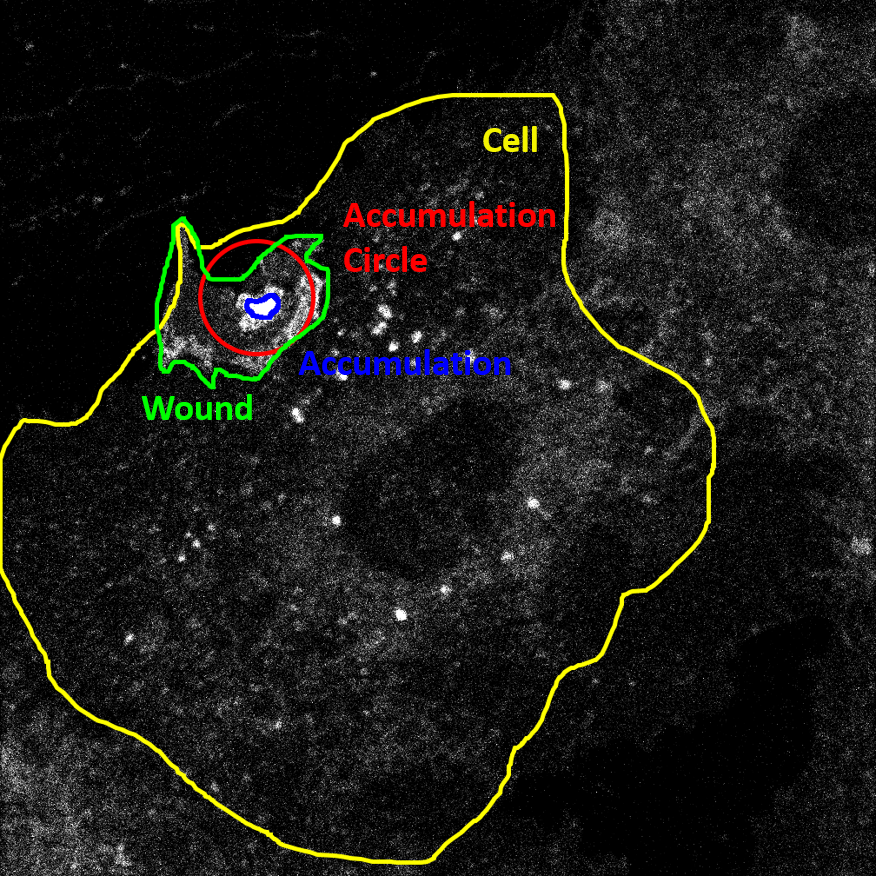

##### Available Measurements
1. Accumulation Circle
- Mean Intensity over time
- Normalized Mean Intensity over time

2. Wound
- Wound mean intensity normalized by cell mean intensity (first frame)
- Wound area normalized by cell area

3. Accumulation
- Accumulation Mean Intensity
- Mean Area

4. Whole Cell
- Mean intensity over time (control)

# 1. Accumulation Circle 
### 1.1 Mean Intensity

In [ ]:
# MeanIntensity: Mean of the mean intensity in the accumulation circle
# Normalized Mean Intensity: Mean of the Mean intensity normalized to first time point (first timepoint = 1)

In [ ]:
# errorbar choices:

C:\ProgramData\Anaconda3\envs\tabanalysis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


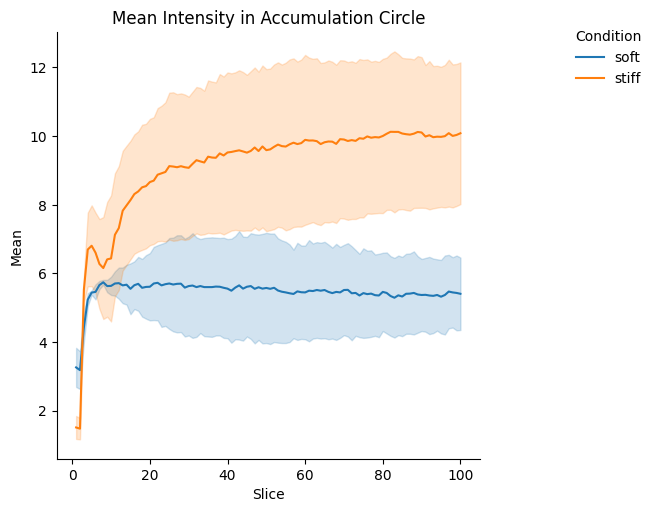

In [6]:
# Plot summarizing graph
ax= sns.relplot(data=df_AccumulationCircle, x="Slice", y="Mean", hue="Condition", kind="line", errorbar="se")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Mean Intensity in Accumulation Circle")
plt.savefig(os.path.join(parent_dir, "MeanIntensityAccumulationCircle.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

In [ ]:
# Check why it's not starting at 1 . Should be because it's normalized to the first frame intensity!!!

C:\ProgramData\Anaconda3\envs\tabanalysis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


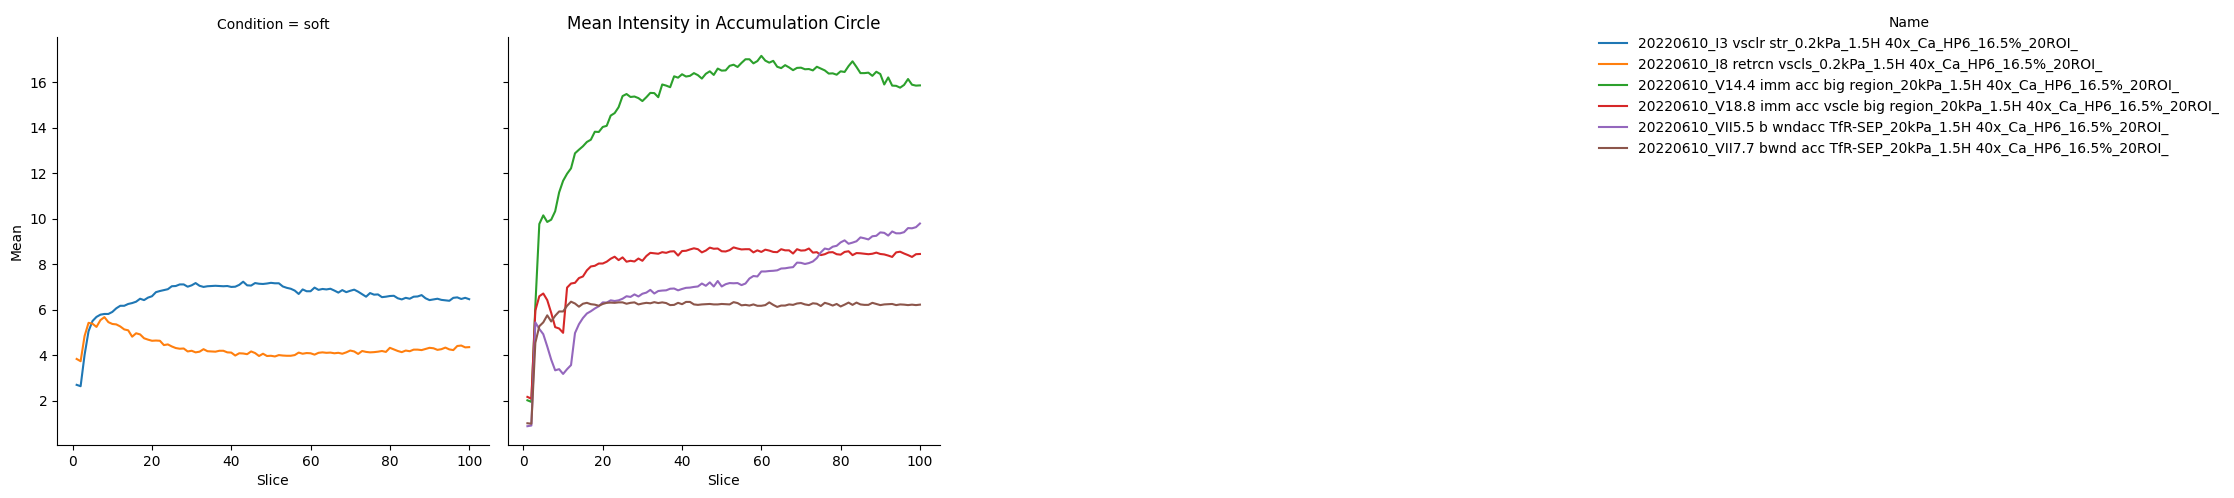

In [7]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
ax= sns.relplot(data=df_AccumulationCircle, x="Slice", y="Mean", col="Condition", hue="Name", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Mean Intensity in Accumulation Circle")
plt.show()

### 1.2. Normalized Mean Intensity
normalized to first frame

C:\ProgramData\Anaconda3\envs\tabanalysis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


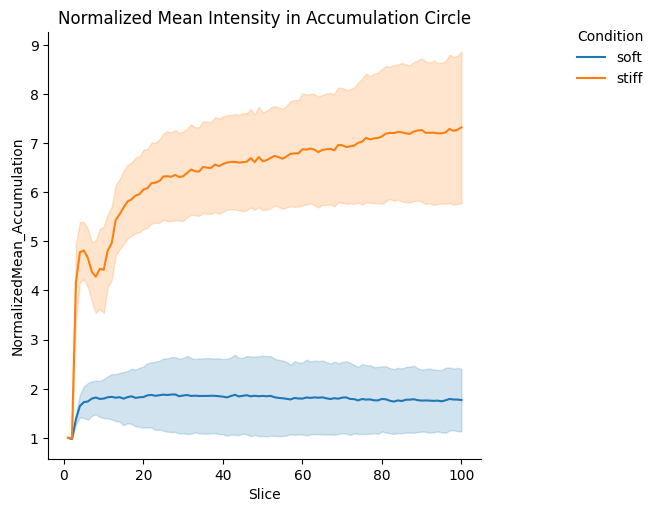

In [8]:
# Plot summarizing graph
ax= sns.relplot(data=df_AccumulationCircle, x="Slice", y="NormalizedMean_Accumulation", hue="Condition", kind="line", errorbar="se")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Normalized Mean Intensity in Accumulation Circle")
plt.savefig(os.path.join(parent_dir, "NormalizedMeanIntensityAccumulationCircle.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

C:\ProgramData\Anaconda3\envs\tabanalysis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


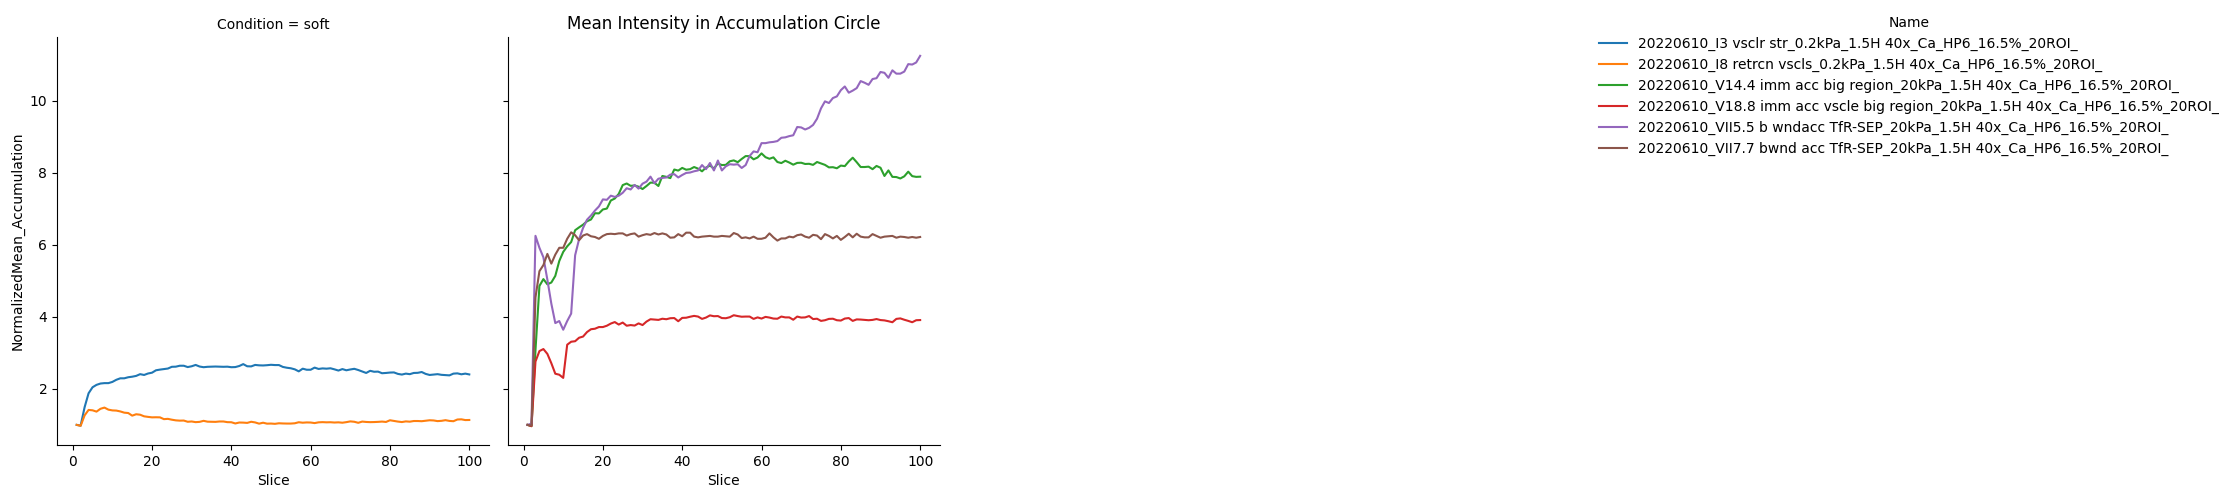

In [9]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
ax= sns.relplot(data=df_AccumulationCircle, x="Slice", y="NormalizedMean_Accumulation", col="Condition", hue="Name", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Mean Intensity in Accumulation Circle")
plt.show()

In [10]:
# Summarize tables and save as excel
df_mean = df_AccumulationCircle.pivot_table(index="Slice", columns=["Condition"] , values=["Mean", "NormalizedMean_Accumulation"], aggfunc=['count', np.mean, np.median, np.std, np.min, np.max])
df_mean.to_excel(os.path.join(parent_dir, "AccumulationCircle_MeanIntensity.xlsx"))

# 2. Wound 
### 2.1 Wound mean intensity normalized by cell mean intensity

In [12]:
df_Wound

,index,,Label,Area,Mean,StdDev,Min,Max,X,Y,IntDen,Median,RawIntDen,Slice,Name,Condition
0,200,201,Wound:WoundArea_big:t:1/100 - 20220610_I3 vscl...,1140.36,5.11,8.67,0,182,29.33,41.66,5822.86,2,692785.0,1,20220610_I3 vsclr str_0.2kPa_1.5H 40x_Ca_HP6_1...,soft
1,201,202,Wound:WoundArea_big:t:2/100 - 20220610_I3 vscl...,1140.36,4.82,8.18,0,156,29.33,41.66,5495.33,2,653817.0,2,20220610_I3 vsclr str_0.2kPa_1.5H 40x_Ca_HP6_1...,soft
2,202,203,Wound:WoundArea_big:t:3/100 - 20220610_I3 vscl...,1140.36,5.43,8.65,0,159,29.33,41.66,6188.47,2,736285.0,3,20220610_I3 vsclr str_0.2kPa_1.5H 40x_Ca_HP6_1...,soft
3,203,204,Wound:WoundArea_big:t:4/100 - 20220610_I3 vscl...,1140.36,5.93,9.01,0,159,29.33,41.66,6763.18,3,804662.0,4,20220610_I3 vsclr str_0.2kPa_1.5H 40x_Ca_HP6_1...,soft
4,204,205,Wound:WoundArea_big:t:5/100 - 20220610_I3 vscl...,1140.36,6.16,9.17,0,149,29.33,41.66,7028.97,3,836285.0,5,20220610_I3 vsclr str_0.2kPa_1.5H 40x_Ca_HP6_1...,soft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2280,296,Wound:WoundArea_big:c:2/2 t:96/100 - 20220610_...,257.42,4.97,10.00,0,182,51.72,9.39,1279.20,2,152195.0,96,20220610_VII7.7 bwnd acc TfR-SEP_20kPa_1.5H 40...,stiff
596,2281,297,Wound:WoundArea_big:c:2/2 t:97/100 - 20220610_...,257.42,4.95,10.11,0,163,51.72,9.39,1273.42,2,151507.0,97,20220610_VII7.7 bwnd acc TfR-SEP_20kPa_1.5H 40...,stiff
597,2282,298,Wound:WoundArea_big:c:2/2 t:98/100 - 20220610_...,257.42,4.97,10.25,0,214,51.72,9.39,1280.16,2,152309.0,98,20220610_VII7.7 bwnd acc TfR-SEP_20kPa_1.5H 40...,stiff
598,2283,299,Wound:WoundArea_big:c:2/2 t:99/100 - 20220610_...,257.42,4.97,9.96,0,172,51.72,9.39,1279.22,2,152198.0,99,20220610_VII7.7 bwnd acc TfR-SEP_20kPa_1.5H 40...,stiff


In [13]:
grouped_Cell = df_Cell.groupby("Name")
first_frame_mean_cell = grouped_Cell["Mean"].transform("first")

In [14]:
df_Wound["Mean_Normalized"] =df_Wound["Mean"] / first_frame_mean_cell
grouped = df_Wound.groupby("Name")
first_frame_mean = grouped["Mean_Normalized"].transform("first")
df_Wound["Mean_PercentageChange"] =df_Wound["Mean_Normalized"] / first_frame_mean

C:\Users\MiN_Acc1\AppData\Local\Temp\5\ipykernel_80840\2833647799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wound["Mean_Normalized"] =df_Wound["Mean"] / first_frame_mean_cell
C:\Users\MiN_Acc1\AppData\Local\Temp\5\ipykernel_80840\2833647799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wound["Mean_PercentageChange"] =df_Wound["Mean_Normalized"] / first_frame_mean


In [15]:
df_mean = df_Wound.pivot_table(index="Slice", columns=["Condition"] , values=["Mean_PercentageChange"], aggfunc=['count', np.mean, np.median, np.std, np.min, np.max])
df_mean.to_excel(os.path.join(parent_dir, "Wound_MeanIntensity.xlsx"))

C:\ProgramData\Anaconda3\envs\tabanalysis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'MWoundMeanIntensity/normalized to cell intensity first frame')

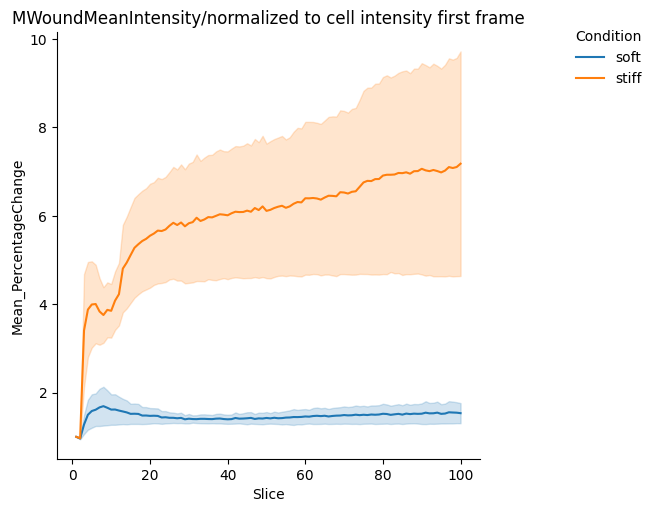

In [16]:
# Plot summarizing graph
ax= sns.relplot(data=df_Wound, x="Slice", y="Mean_PercentageChange", hue="Condition", kind="line", errorbar="se")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("MWoundMeanIntensity/normalized to cell intensity first frame")

C:\ProgramData\Anaconda3\envs\tabanalysis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


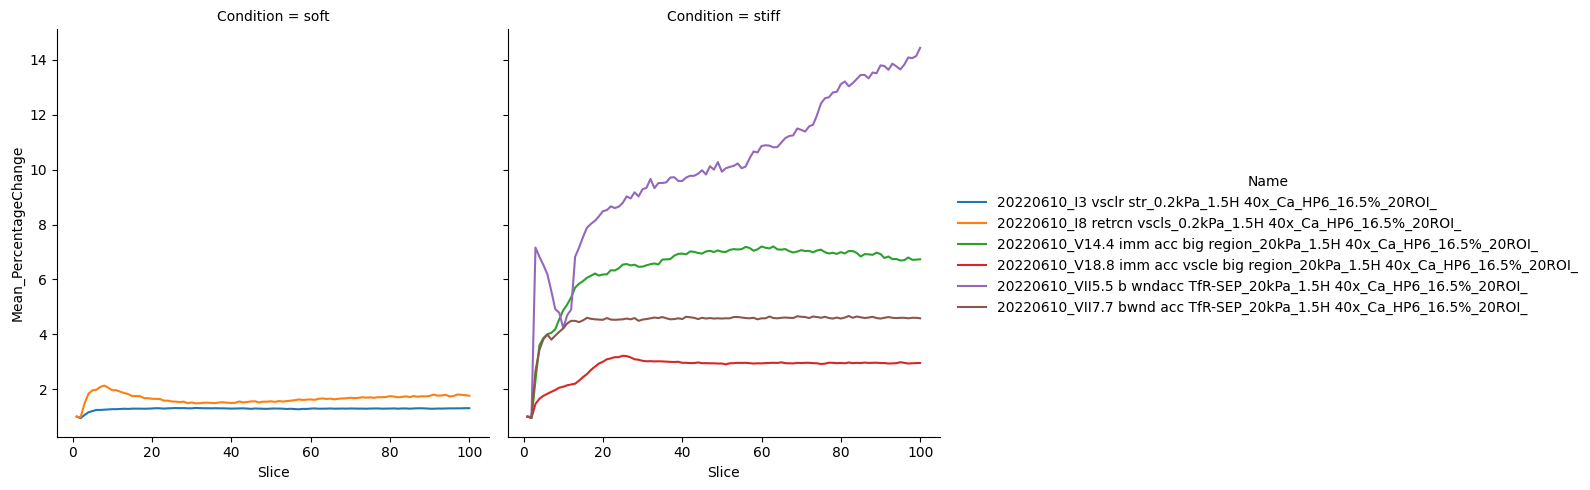

In [17]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
sns.relplot(data=df_Wound, x="Slice", y="Mean_PercentageChange", col="Condition", hue="Name", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.show()

### 2.2 Wound area normalized by cell area

In [18]:
# Wound size
df_Wound["WoundArea/CellArea"] = df_Wound["Area"]/df_Cell["Area"]
wound_size = df_Wound.loc[:, ["Area", "WoundArea/CellArea", "Name", "Condition"]].groupby(["Name"]).max()
wound_size.to_excel(os.path.join(parent_dir, "Wound_Size.xlsx"))

C:\Users\MiN_Acc1\AppData\Local\Temp\5\ipykernel_80840\1717293725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Wound["WoundArea/CellArea"] = df_Wound["Area"]/df_Cell["Area"]


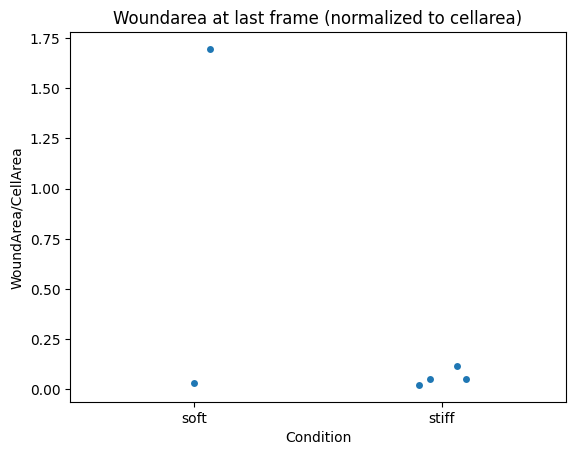

In [19]:
sns.stripplot(data=wound_size, y="WoundArea/CellArea", x="Condition")
plt.title("Woundarea at last frame (normalized to cellarea)")
plt.savefig(os.path.join(parent_dir, "WoundSizeNormalizedToCell.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

# 4. Whole Cell

### 4.1. Intensity (control plot)

In [20]:
df_cell_mean = df_Cell.pivot_table(index="Slice", columns="Condition", values="Mean")

In [21]:
#Normalized
grouped_Cell = df_Cell.groupby("Name")
first_frame_mean_cell = grouped_Cell["Mean"].transform("first")
df_Cell["Mean_RelativeChange"] =df_Cell["Mean"] / first_frame_mean_cell

C:\Users\MiN_Acc1\AppData\Local\Temp\5\ipykernel_80840\4156089181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Cell["Mean_RelativeChange"] =df_Cell["Mean"] / first_frame_mean_cell


C:\ProgramData\Anaconda3\envs\tabanalysis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


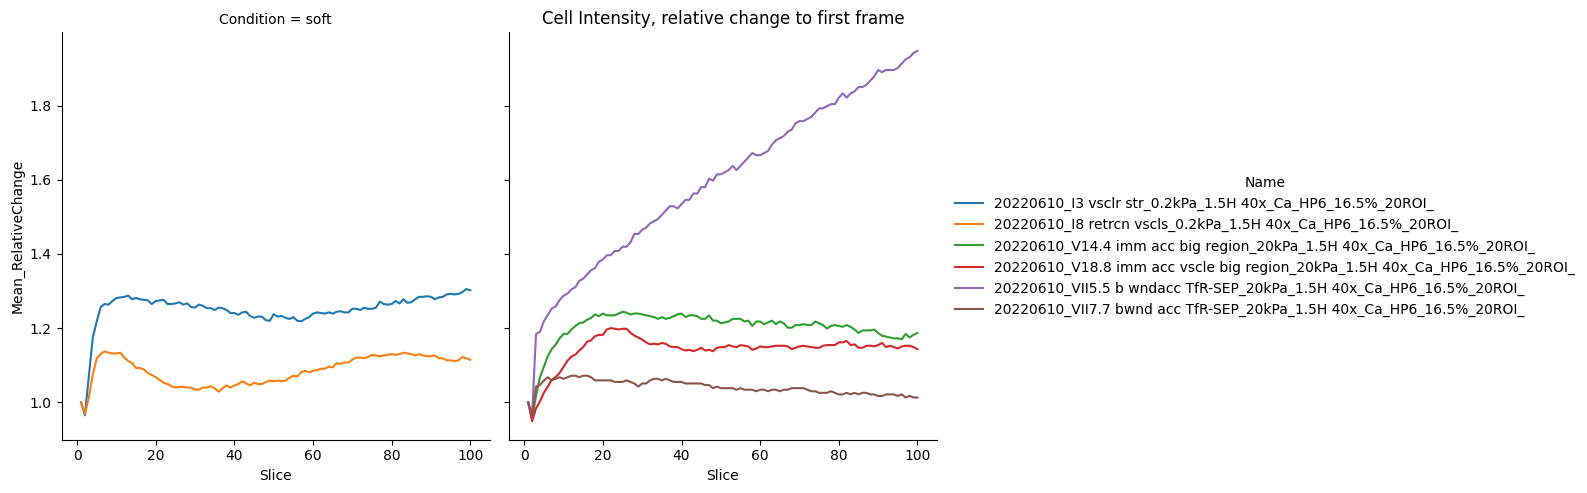

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
sns.relplot(data=df_Cell, x="Slice", y="Mean_RelativeChange", col="Condition", hue="Name", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Cell Intensity, relative change to first frame")
plt.show()

plt.savefig(os.path.join(parent_dir, "CellIntensity_individual.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

C:\ProgramData\Anaconda3\envs\tabanalysis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


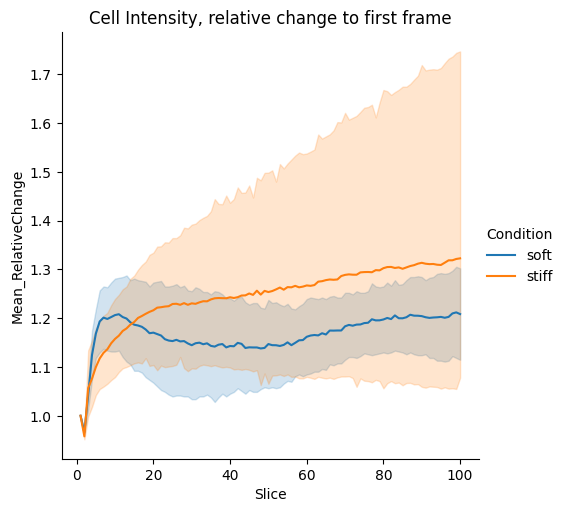

<Figure size 640x480 with 0 Axes>

In [23]:
# Plot individual measurements per movie (maybe just to check if there are outliers)
sns.relplot(data=df_Cell, x="Slice", y="Mean_RelativeChange", hue="Condition", kind="line")
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
plt.title("Cell Intensity, relative change to first frame")
plt.show()
plt.savefig(os.path.join(parent_dir, "CellIntensity_pooled.tiff"), dpi=600, transparent=True, bbox_inches="tight", format="tiff")

In [ ]:
# for individual measurements, split df_Cell in soft and stiff, then pivotable for both independently, then show next to each other

In [30]:
df_mean = df_Cell.pivot_table(index="Slice", columns=["Condition"] , values=["Mean_RelativeChange"], aggfunc=[np.mean, np.std])
df_mean.to_excel(os.path.join(parent_dir, "CellIntensity_MeanIntensity_Pooled.xlsx"))

In [32]:
df_mean = df_Cell.pivot_table(index="Slice", columns=["Condition", "Name"] , values=["Mean_RelativeChange"], aggfunc=[np.mean])
df_mean.to_excel(os.path.join(parent_dir, "CellIntensity_MeanIntensity_Individual.xlsx"))